In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the cleaned data
df_manoutput = pd.read_csv(r'C:\Users\adinr\Downloads\Python_Project-1_ESDM\Python_Project-1_ESDM\Data\cleaned_manufacturing_output.csv')
df2_pngprod = pd.read_csv(r'C:\Users\adinr\Downloads\Python_Project-1_ESDM\Python_Project-1_ESDM\Data\cleaned_petroleum_and_natural_gas_production.csv')
df3_gdp_long = pd.read_csv(r'C:\Users\adinr\Downloads\Python_Project-1_ESDM\Python_Project-1_ESDM\Data\cleaned_gdp.csv')
df_employment = pd.read_csv(r'C:\Users\adinr\Downloads\Python_Project-1_ESDM\Python_Project-1_ESDM\Data\cleaned_employment.csv')

In [3]:
# Data from https://www.indexmundi.com/commodities/?commodity=indonesian-liquified-natural-gas
df_gcp = pd.DataFrame({
    'Year': [2001, 2003, 2005, 2007, 2008, 2010, 2013, 2015, 2018, 2019, 2020],
    'Natural_Gas_Consumption': [36200000000, 55300000000, 39400000000, 23400000000, 45200000000, 39560000000, 39100000000, 39700000000, 42320000000, 42320000000, 42320000000],
    'Natural_Gas_Production': [69000000000, 77600000000, 76000000000, 56000000000, 70000000000, 85700000000, 82800000000, 76250000000, 70400000000, 75000000000, 72090000000]
})
df_gcp

,Year,Natural_Gas_Consumption,Natural_Gas_Production
0,2001,36200000000,69000000000
1,2003,55300000000,77600000000
2,2005,39400000000,76000000000
3,2007,23400000000,56000000000
4,2008,45200000000,70000000000
5,2010,39560000000,85700000000
6,2013,39100000000,82800000000
7,2015,39700000000,76250000000
8,2018,42320000000,70400000000
9,2019,42320000000,75000000000


In [4]:
# Correct conversion formula applied
df_gcp['Natural_Gas_Consumption_MMSCF'] = (df_gcp['Natural_Gas_Consumption'] * 35.3147) / 1_000_000
df_gcp['Natural_Gas_Production_MMSCF'] = (df_gcp['Natural_Gas_Production'] * 35.3147) / 1_000_000
df_gcp

,Year,Natural_Gas_Consumption,Natural_Gas_Production,Natural_Gas_Consumption_MMSCF,Natural_Gas_Production_MMSCF
0,2001,36200000000,69000000000,1278392.140,2436714.300
1,2003,55300000000,77600000000,1952902.910,2740420.720
2,2005,39400000000,76000000000,1391399.180,2683917.200
3,2007,23400000000,56000000000,826363.980,1977623.200
4,2008,45200000000,70000000000,1596224.440,2472029.000
5,2010,39560000000,85700000000,1397049.532,3026469.790
6,2013,39100000000,82800000000,1380804.770,2924057.160
7,2015,39700000000,76250000000,1401993.590,2692745.875
8,2018,42320000000,70400000000,1494518.104,2486154.880
9,2019,42320000000,75000000000,1494518.104,2648602.500


In [5]:
# Merge all data on Year
merged_df = pd.merge(df3_gdp_long[['Year', 'GDP']], df_manoutput, on='Year', how='outer')
merged_df = pd.merge(merged_df, df2_pngprod, on='Year', how='outer')

merged_df = merged_df[(merged_df['Year'] < 1967) | (merged_df['Year'] > 1995)]
# Remove rows with NaN values in any column
merged_df = merged_df.dropna()

merged_df

,Year,GDP,Manufacture_Output_Billions_of_USD,Natural_Gas_Output_MMscf
29,1996,2.273697e+11,58.244461,3164016.20
30,1997,2.157490e+11,57.805514,3166034.90
31,1998,9.544555e+10,23.857255,2978851.90
32,1999,1.400014e+11,36.393182,3068349.10
33,2000,1.650210e+11,37.393351,2845532.90
34,2001,1.604469e+11,49.344813,3762828.50
35,2002,1.956606e+11,62.519980,2279373.90
36,2003,2.347725e+11,66.329893,2142605.00
37,2004,2.568369e+11,72.083392,3026069.30
38,2005,2.858686e+11,78.349463,2985341.00


In [6]:
# Apply min-max scaling using pandas
normalized_df = merged_df[['Year']].copy()
normalized_df[['GDP', 'Manufacture_Output_Billions_of_USD', 'Natural_Gas_Output_MMscf']] = merged_df[['GDP', 'Manufacture_Output_Billions_of_USD', 'Natural_Gas_Output_MMscf']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

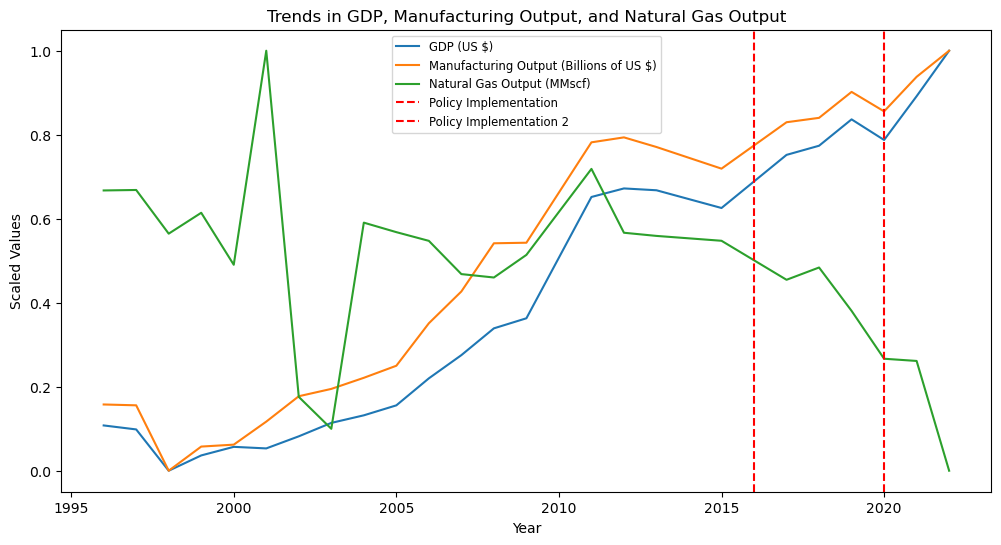

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(data=normalized_df, x='Year', y='GDP', label='GDP (US $)')
sns.lineplot(data=normalized_df, x='Year', y='Manufacture_Output_Billions_of_USD', label='Manufacturing Output (Billions of US $)')
sns.lineplot(data=normalized_df, x='Year', y='Natural_Gas_Output_MMscf', label='Natural Gas Output (MMscf)')

plt.xlabel('Year')
plt.ylabel('Scaled Values')
plt.title('Trends in GDP, Manufacturing Output, and Natural Gas Output')

plt.axvline(x=2016, color='red', linestyle='--', label='Policy Implementation')
plt.axvline(x=2020, color='red', linestyle='--', label='Policy Implementation 2')


plt.legend(fontsize='small')
plt.grid(False)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     486.9
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           7.44e-19
Time:                        20:23:44   Log-Likelihood:                 44.550
No. Observations:                  24   AIC:                            -81.10
Df Residuals:                      20   BIC:                            -76.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

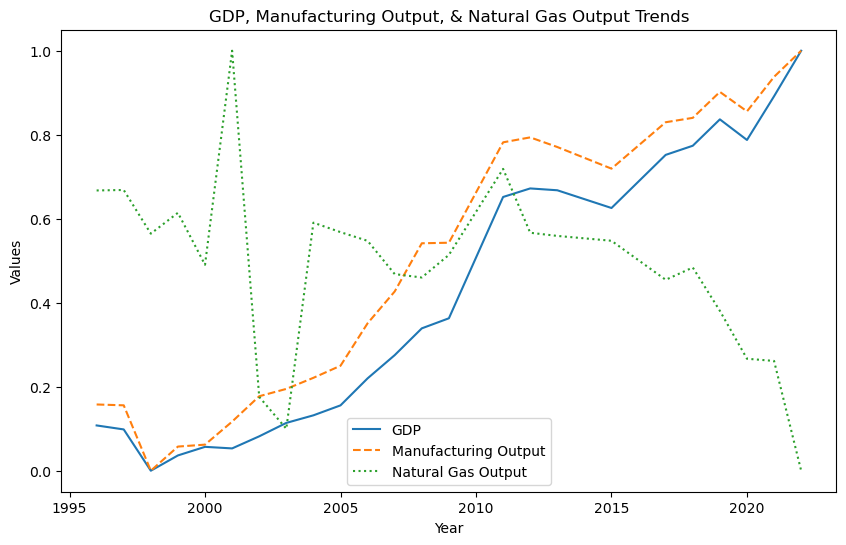

In [8]:
# Create Post-policy binary column (2016 onward)
normalized_df['post_policy'] = normalized_df['Year'].apply(lambda x: 1 if x >= 2016 else 0)

# Handle Missing values - drop NaNs
normalized_df.dropna(subset=['Manufacture_Output_Billions_of_USD', 'Natural_Gas_Output_MMscf', 'GDP'], inplace=True)

# Model Variables
# GDP as the dependent variable
X = normalized_df[['Manufacture_Output_Billions_of_USD', 'Natural_Gas_Output_MMscf', 'post_policy']]
y = normalized_df['GDP']

# Add intercept for regression
X = sm.add_constant(X)

# Fit the OLS Model
model = sm.OLS(y, X).fit()
print(model.summary())

# Visualize trends
plt.figure(figsize=(10, 6))

plt.plot(normalized_df['Year'], normalized_df['GDP'], label="GDP")
plt.plot(normalized_df['Year'], normalized_df['Manufacture_Output_Billions_of_USD'], label="Manufacturing Output", linestyle='dashed')
plt.plot(normalized_df['Year'], normalized_df['Natural_Gas_Output_MMscf'], label="Natural Gas Output", linestyle='dotted')

plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.title("GDP, Manufacturing Output, & Natural Gas Output Trends")
plt.show()

                               OLS Regression Results                               
Dep. Variable:     Natural_Gas_Output_MMscf   R-squared:                       0.246
Model:                                  OLS   Adj. R-squared:                  0.133
Method:                       Least Squares   F-statistic:                     2.174
Date:                      Tue, 17 Dec 2024   Prob (F-statistic):              0.123
Time:                              20:23:57   Log-Likelihood:                 7.0196
No. Observations:                        24   AIC:                            -6.039
Df Residuals:                            20   BIC:                            -1.327
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

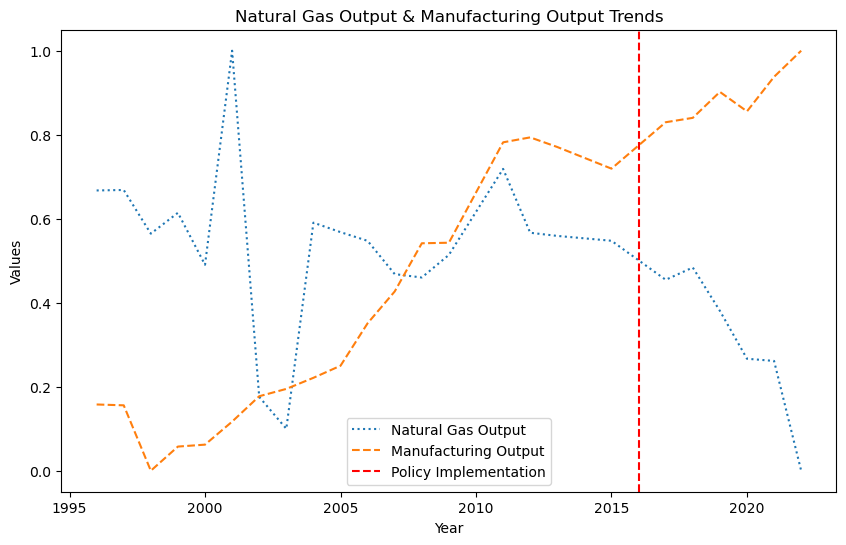

In [9]:
# Create Post-policy binary column (2016 onward)
normalized_df['post_policy'] = normalized_df['Year'].apply(lambda x: 1 if x >= 2016 else 0)

# Handle Missing values - drop NaNs
normalized_df.dropna(subset=['Natural_Gas_Output_MMscf'], inplace=True)

# Model Variables
# Natural Gas Output as the dependent variable
X = normalized_df[['post_policy', 'Manufacture_Output_Billions_of_USD', 'GDP']]  # Select relevant predictors
y = normalized_df['Natural_Gas_Output_MMscf']

# Add intercept for regression
X = sm.add_constant(X)

# Fit the OLS Model
model = sm.OLS(y, X).fit()
print(model.summary())

# Visualize trends
plt.figure(figsize=(10, 6))

plt.plot(normalized_df['Year'], normalized_df['Natural_Gas_Output_MMscf'], label="Natural Gas Output", linestyle='dotted')
plt.plot(normalized_df['Year'], normalized_df['Manufacture_Output_Billions_of_USD'], label="Manufacturing Output", linestyle='dashed')

plt.axvline(x=2016, color='red', linestyle='--', label='Policy Implementation')

plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.title("Natural Gas Output & Manufacturing Output Trends")
plt.show()

In [10]:
# Create interaction term for DID
normalized_df['post_policy_interaction'] = normalized_df['post_policy'] * normalized_df['Manufacture_Output_Billions_of_USD']

# Handle Missing values - drop NaNs
normalized_df.dropna(subset=['Manufacture_Output_Billions_of_USD', 'Natural_Gas_Output_MMscf'], inplace=True)

# Model Variables
# Set Natural Gas Output as the dependent variable
X = normalized_df[['Manufacture_Output_Billions_of_USD', 'post_policy', 'post_policy_interaction']]
y = normalized_df['Natural_Gas_Output_MMscf']

# Add intercept
X = sm.add_constant(X)

# Fit the OLS Model
model = sm.OLS(y, X).fit()
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Natural_Gas_Output_MMscf   R-squared:                       0.363
Model:                                  OLS   Adj. R-squared:                  0.267
Method:                       Least Squares   F-statistic:                     3.792
Date:                      Tue, 17 Dec 2024   Prob (F-statistic):             0.0265
Time:                              20:24:06   Log-Likelihood:                 9.0373
No. Observations:                        24   AIC:                            -10.07
Df Residuals:                            20   BIC:                            -5.362
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [14]:
merged_df = pd.merge(merged_df, df_employment, on='Year', how='left')

In [15]:
merged_df.rename(columns={"Lapangan Pekerjaan Utama": "Sector"}, inplace=True)

In [12]:
# Proportion of NaN values
na_percentage = merged_df.isnull().mean().sum()
print(f"Total percentage of missing data: {na_percentage:.2%}")

Total percentage of missing data: 0.00%


In [16]:
merged_df

,Year,GDP,Manufacture_Output_Billions_of_USD,Natural_Gas_Output_MMscf,Sector,Employment
0,1996,2.273697e+11,58.244461,3164016.2,NaN,NaN
1,1997,2.157490e+11,57.805514,3166034.9,NaN,NaN
2,1998,9.544555e+10,23.857255,2978851.9,NaN,NaN
3,1999,1.400014e+11,36.393182,3068349.1,NaN,NaN
4,2000,1.650210e+11,37.393351,2845532.9,NaN,NaN
...,...,...,...,...,...,...
149,2022,1.319076e+12,241.872729,1962929.0,Jasa Keuangan dan Asuransi,1512007.0
150,2022,1.319076e+12,241.872729,1962929.0,Jasa Perusahaan,1940203.0
151,2022,1.319076e+12,241.872729,1962929.0,"Administrasi Pemerintahan, Pertahanan dan Jami...",4633405.0
152,2022,1.319076e+12,241.872729,1962929.0,Jasa Kesehatan dan Kegiatan Sosial,2384745.0


In [10]:
merged_df.dropna(subset=['Employment'], inplace=True)  # Drop rows missing 'Employment' data


In [12]:
merged_df['post_2016'] = merged_df['Year'].apply(lambda x: 1 if x >= 2016 else 0)

C:\Users\adinr\AppData\Local\Temp\ipykernel_32508\2599630863.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)


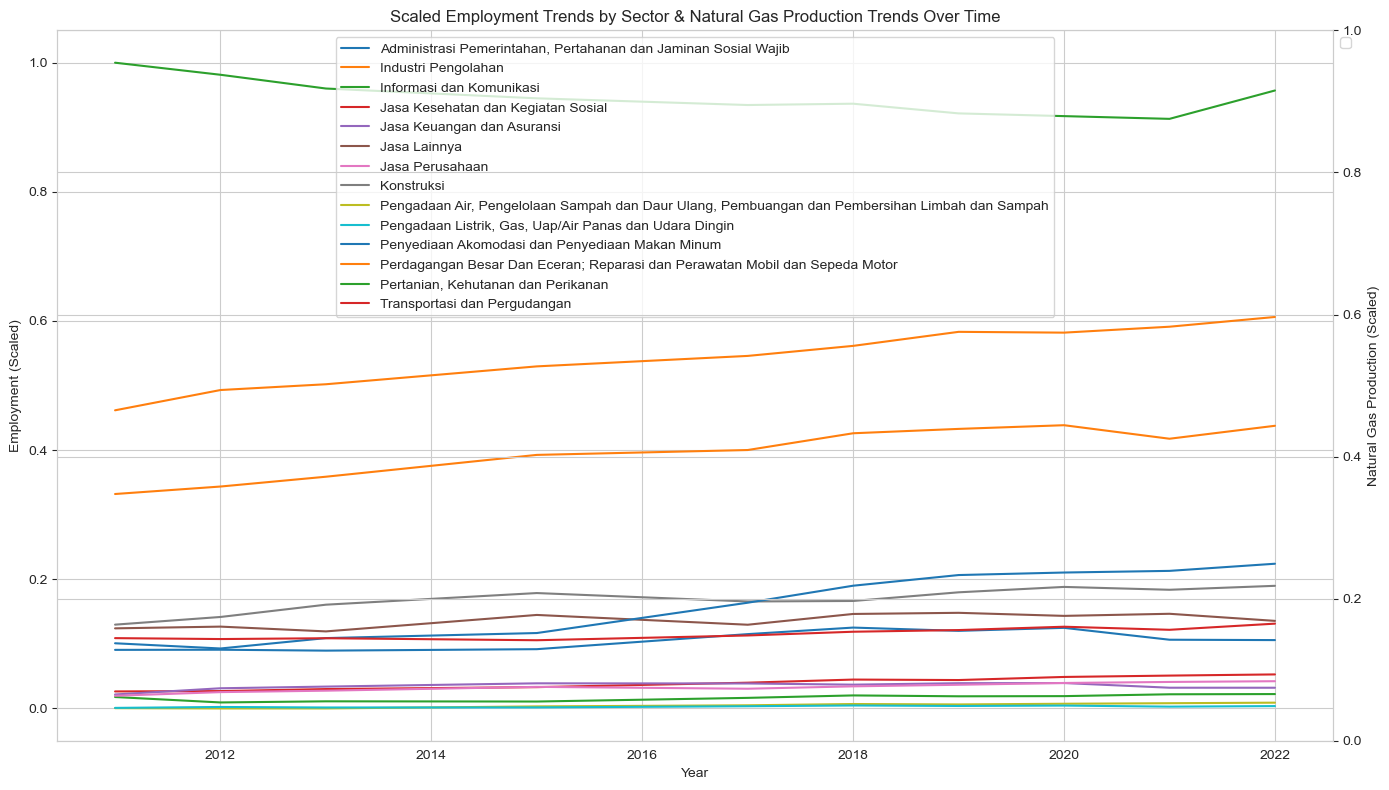

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Normalize Employment and Natural Gas Output
scaler = MinMaxScaler()

# Apply scaling to employment data
employment_by_sector['Employment_Scaled'] = scaler.fit_transform(
    employment_by_sector[['Employment']])

# Plotting
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot employment by sectors using a lineplot
for sector in employment_by_sector['Sector'].unique():
    sector_data = employment_by_sector[employment_by_sector['Sector'] == sector]
    sns.lineplot(data=sector_data, x='Year', y='Employment_Scaled', label=sector)

# Overlay natural gas production as a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()


# Customize plot
ax1.set_xlabel("Year")
ax1.set_ylabel("Employment (Scaled)")
ax2.set_ylabel("Natural Gas Production (Scaled)")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
plt.title("Scaled Employment Trends by Sector & Natural Gas Production Trends Over Time")
plt.tight_layout()
plt.show()


In [15]:
correlation = merged_df['Employment'].corr(merged_df['Natural_Gas_Output_MMscf'])
print(f"Correlation between employment and natural gas production: {correlation:.2f}")


Correlation between employment and natural gas production: -0.04


In [16]:
from scipy.stats import ttest_ind

# Split data pre-2016 and post-2016
employment_pre_2016 = merged_df[merged_df['post_2016'] == 0]['Employment'].dropna()
employment_post_2016 = merged_df[merged_df['post_2016'] == 1]['Employment'].dropna()

# Perform the t-test
t_stat, p_value = ttest_ind(employment_pre_2016, employment_post_2016, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -0.5301549882309875
P-value: 0.5970074006677759


In [18]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
columns_to_scale = ['Employment', 'Natural_Gas_Output_MMscf', 'GDP', 'Manufacture_Output_Billions_of_USD']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the data
merged_df[columns_to_scale] = scaler.fit_transform(merged_df[columns_to_scale])

# Verify changes
print(merged_df.head())


    Year       GDP  Manufacture_Output_Billions_of_USD  \
14  2011 -1.010501                           -0.764086   
15  2011 -1.010501                           -0.764086   
16  2011 -1.010501                           -0.764086   
17  2011 -1.010501                           -0.764086   
18  2011 -1.010501                           -0.764086   

    Natural_Gas_Output_MMscf  \
14                  1.515931   
15                  1.515931   
16                  1.515931   
17                  1.515931   
18                  1.515931   

                             Lapangan Pekerjaan Utama  Employment  post_2016  
14                 Pertanian, Kehutanan dan Perikanan    3.116585          0  
15                                Industri Pengolahan    0.534883          0  
16  Pengadaan Listrik, Gas, Uap/Air Panas dan Udar...   -0.745324          0  
17  Pengadaan Air, Pengelolaan Sampah dan Daur Ula...   -0.746974          0  
18                                         Konstruksi   -0.2470

In [19]:
merged_df

,Year,GDP,Manufacture_Output_Billions_of_USD,Natural_Gas_Output_MMscf,Lapangan Pekerjaan Utama,Employment,post_2016
14,2011,-1.010501,-0.764086,1.515931,"Pertanian, Kehutanan dan Perikanan",3.116585,0
15,2011,-1.010501,-0.764086,1.515931,Industri Pengolahan,0.534883,0
16,2011,-1.010501,-0.764086,1.515931,"Pengadaan Listrik, Gas, Uap/Air Panas dan Udar...",-0.745324,0
17,2011,-1.010501,-0.764086,1.515931,"Pengadaan Air, Pengelolaan Sampah dan Daur Ula...",-0.746974,0
18,2011,-1.010501,-0.764086,1.515931,Konstruksi,-0.247072,0
...,...,...,...,...,...,...,...
149,2022,2.073547,1.958640,-2.180145,Jasa Keuangan dan Asuransi,-0.624738,1
150,2022,2.073547,1.958640,-2.180145,Jasa Perusahaan,-0.585611,1
151,2022,2.073547,1.958640,-2.180145,"Administrasi Pemerintahan, Pertahanan dan Jami...",-0.339518,1
152,2022,2.073547,1.958640,-2.180145,Jasa Kesehatan dan Kegiatan Sosial,-0.544991,1
